In [73]:
from simanneal import Annealer
import random, math
import csv
from collections import defaultdict
class ClinicFinder(Annealer):
    def __init__(self, state, distance_matrix, population, risk, clinic_amount):
        self.distance_matrix = distance_matrix
        self.population = population
        self.risk = risk
        self.clinic_amount = clinic_amount
        super(ClinicFinder, self).__init__(state)

    def move(self):
        a = random.randint(0, self.clinic_amount - 1)
        b = random.randint(self.clinic_amount, len(self.state) - 1)
        self.state[a], self.state[b] = self.state[b], self.state[a]


    def energy(self):
        e = 0
        for i in range(self.clinic_amount,len(self.state)):
            min = 1000000000.0
            for j in range(self.clinic_amount):
                if self.distance_matrix[self.state[i]][self.state[j]] <  min:
                    min = self.distance_matrix[self.state[i]][self.state[j]]
            e += min * self.risk[self.state[i]]
        return e

In [74]:
file = open('./annealer/monroe_tracts.csv','r')
reader = csv.DictReader(file)
line_count = 0
risk = {}
population = {}
tracts = []
for row in reader:
    if line_count != 0:
        risk[row['tract']] =  float(row['ccvi'])
        population[row['tract']] =  float(row['pop_est'])
        tracts.append(row['tract'])
    line_count+=1
file2 = open('./annealer/monroe_tract_dists.csv','r')
reader2 = csv.DictReader(file2)
distance_matrix = defaultdict(dict)
for row in reader2:
    if line_count != 0:
        distance_matrix[row['tract1']][row['tract2']] = float(row['mi_to_tract'])
    line_count += 1
random.shuffle(tracts)

CF = ClinicFinder(tracts,distance_matrix,population,risk,65)
CF.Tmax = 500.0
print(CF.clinic_amount)
print(CF.state)


65
['10400', '10500', '15304', '15301', '6900', '11603', '14302', '11208', '8301', '5300', '10901', '7500', '11902', '7801', '13001', '13901', '9500', '6300', '14103', '1900', '14204', '12401', '15102', '7000', '4702', '13002', '4701', '10602', '3200', '9400', '6600', '8702', '4800', '14905', '9602', '9302', '2700', '11100', '13204', '14903', '2000', '15000', '3900', '14700', '13104', '3500', '12301', '700', '8500', '6700', '5100', '13402', '13800', '15303', '5800', '2100', '3100', '1300', '10902', '11203', '13503', '13203', '10100', '13702', '11901', '13401', '13508', '13206', '12100', '11301', '13603', '9604', '11707', '13507', '11706', '11000', '12305', '11201', '13604', '1000', '15200', '11604', '9603', '11400', '13103', '13205', '9601', '3600', '11504', '5600', '14001', '14901', '9301', '10800', '13300', '4100', '12500', '14804', '3805', '3000', '8701', '9200', '5700', '12304', '14504', '14400', '14203', '11708', '15400', '14802', '4602', '6800', '11705', '14104', '5000', '3700', 

In [75]:
states, utility = CF.anneal()
states_copy = [x for x in states]

print(states)
print(utility)

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         79.39    87.00%    41.60%     0:00:56     0:00:00

['4702', '10100', '7900', '8702', '13103', '10901', '9603', '15304', '2200', '11207', '13206', '7700', '14804', '7000', '11400', '3700', '11708', '14003', '13001', '14104', '6600', '13507', '8701', '15000', '11705', '8200', '15301', '6100', '12500', '5200', '11902', '13505', '2900', '13604', '12700', '15101', '11605', '11501', '12301', '4602', '3400', '2100', '6300', '11603', '12304', '10601', '8500', '14505', '4701', '13002', '13902', '13402', '13901', '14202', '13204', '11604', '14203', '1800', '11208', '14700', '5700', '11505', '11601', '14901', '7100', '14004', '5500', '8000', '4100', '2000', '8400', '12600', '6000', '10200', '15303', '12402', '13503', '2300', '7500', '11503', '3805', '11301', '12306', '14903', '14501', '12202', '9400', '4000', '8800', '13603', '11707', '12000', '7801', '3000', '13702', '14803', '3100', '12800', '14504', '9301', '9601', '3600', '13506', '12100', '14906', '11205', '14301', '15102', '10400', '14905', '9604', '11201', '5400', '8600', '10602', '9602', 

In [76]:
f = open("monroe_vaccine_tracts_short.txt", "r")
unique = {x.strip() for x in f}
#print(len(unique))
index = 0
for x in unique:
    for i in range(len(states)):
        if x == states[i]:
            states[index], states[i] = states[i], states[index]
            index = index + 1
            break

#print(states)
#print(unique)
e = 0
e_orig = {}
for i in range(65,len(states)):
    min = 1000000000.0
    for j in range(65):
        if distance_matrix[states[i]][states[j]] <  min:
            min = distance_matrix[states[i]][states[j]]
    e += min * risk[states[i]]
    e_orig[states[i]] = min * risk[states[i]]
print(e)
    
e = 0
e_new = {}
for i in range(65,len(states_copy)):
    min = 1000000000.0
    for j in range(65):
        if distance_matrix[states_copy[i]][states_copy[j]] <  min:
            min = distance_matrix[states_copy[i]][states_copy[j]]
    e += min * risk[states_copy[i]]
    e_new[states_copy[i]] = min * risk[states_copy[i]]

for i in range(65):
    e_orig[states[i]] = 0
    e_new[states_copy[i]] = 0

deltas = defaultdict()
for x in e_new:
    deltas[x] = (e_orig[x] - e_new[x])

77.03871822466601


In [77]:
for i in range(65):
    e_orig[states[i]] = 0
    e_new[states_copy[i]] = 0

In [78]:
deltas = defaultdict()
for x in e_new:
    #deltas[x] = (e_new[x] - e_orig[x])
    deltas |= {x: e_orig[x] - e_new[x]}
    #print(deltas[x], x)

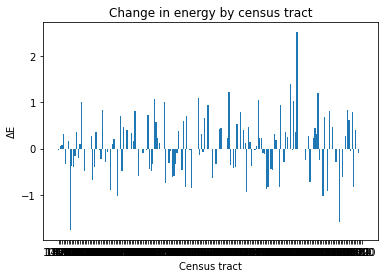

In [79]:
import matplotlib.pyplot as plt

shuffled_deltas = [(x, deltas[x]) for x in deltas]
random.shuffle(shuffled_deltas)

keys = [x for x, y in shuffled_deltas]
values = [y for x, y in shuffled_deltas]
plt.bar(keys, values)
plt.xlabel('Census tract')
plt.ylabel('ΔE')
plt.title('Change in energy by census tract')
plt.savefig('barplot.png')

In [23]:
plt.savefig('barplot.png')

<Figure size 432x288 with 0 Axes>

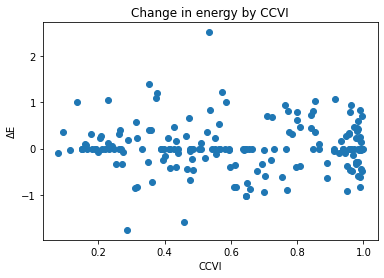

In [80]:
import numpy as np

ccvi = []
delta = []
distances = []
for x in risk:
    ccvi.append(risk[x])
    delta.append(deltas[x])
        
    
ccvi = np.array(ccvi)
delta = np.array(delta)

plt.scatter(ccvi, delta)
plt.xlabel('CCVI')
plt.ylabel('ΔE')
plt.title('Change in energy by CCVI')
#plt.set_title('Energy deltas by CCVI')
plt.show()

In [25]:
plt.savefig('scatterplot.png')

<Figure size 432x288 with 0 Axes>

In [88]:
d = [(x, deltas[x]) for x in deltas]
d = sorted(x, key=lambda x: x[1])
with open('deltas.txt', 'w') as f:
    for x, dx in d:
        f.write(f'{x}, {dx}\n')